### Experiment 6 Recognizing of grayscale images of handwritten digits

.<center>
**Course Name:** Deep learning with python<center>
**Experiment Name:** Recognizing of grayscale images of handwritten digits<center>
**Major:** Computer Science and Technology<center>
**Class:** <center>
**Student Name:** Reeshad Khan<center>
**Student ID:** 2019124921<center>
**Lab:** Computer Room <center> 
**Date:** 2020/05/13 <center>

### Task
Create a neural networks (convnets) for grayscale image classification. Using data augmentation to mitigate overfitting, fine-tuning a
pretrained convnet and
visualizing what convnets learn
* Understanding convolutional neural networks (convnets)
* Using data augmentation to mitigate overfitting
* Using a pretrained convnet to do feature extraction
* Fine-tuning a pretrained convnet
* Visualizing what convnets learn </ul>

### 1 Methodology
First, we’ll feed the neural network the training data, train_images and train_labels.
The network will then learn to associate images and labels.
Finally, we’ll ask the network to produce predictions for test_images, and we’ll verify whether these predictions match the labels from
test_labels.
### 2 MNIST Dataset
#### 2.1 Introduction of MNIST dataset
MNIST - a handwritten digits dataset
* a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology in the 1980s.
* It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. (Modified NIST)
* It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.</ul>

### 2.2 Load MNIST data

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

### 3 Building convolutional network

In [5]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, kernel_size=3, activation='relu'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


### 4 Adding a classifier on top of the convnet

In [7]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

### 5 Training the convnet on MNIST images

In [9]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['acc'])
model.fit(train_images, train_labels,batch_size=128,
            epochs=5,
            verbose=1)


Epoch 1/5
60000/60000 [==============================] - 53s 890us/step - loss: 0.2542 - acc: 0.9177
Epoch 2/5
60000/60000 [==============================] - 47s 784us/step - loss: 0.0560 - acc: 0.9831
Epoch 3/5
60000/60000 [==============================] - 50s 839us/step - loss: 0.0369 - acc: 0.9885
Epoch 4/5
60000/60000 [==============================] - 51s 857us/step - loss: 0.0285 - acc: 0.9914
Epoch 5/5
60000/60000 [==============================] - 47s 779us/step - loss: 0.0226 - acc: 0.9927


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 11s 1ms/step


In [12]:
import matplotlib.pyplot as plt

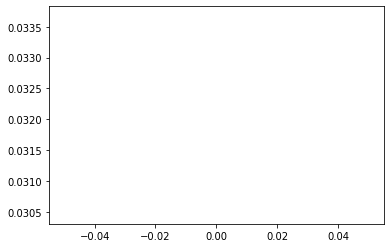

In [13]:
plt.plot(test_loss)

In [14]:
test_loss

0.03206742616253032

### 6 Show image data

In [15]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
img = train_images[0]
img.shape

(28, 28, 1)

In [17]:
img = img.reshape(28,28)

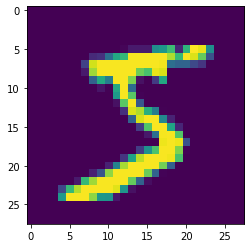

In [18]:
plt.imshow(img)

### 7 Analysis and Conclusion